## Imports

In [1]:
import sys
sys.path.append('../')

In [2]:
from PIL import Image
import requests

In [3]:
from flask_app.commons import util

In [4]:
%load_ext autoreload
%autoreload 2

## Constants

In [5]:
URL = "http://10.2.117.32:5000/predict"

## Themes

* ghost as source: https://www.istockphoto.com/photo/scary-girl-in-bath-gm177042912-19487119
* wizard as ref picture: https://www.istockphoto.com/photo/happy-well-dressed-gentleman-having-photoshooting-in-studio-gm1152185659-312500513
* elf as ref picture: https://www.shutterstock.com/image-photo/elf-long-white-hair-forest-magical-1519333655

### Portrait

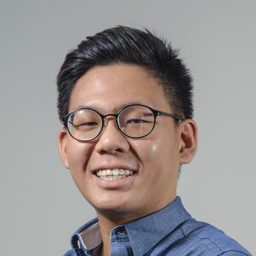

In [7]:
portrait = Image.open('../data/custom/Kianboon_cropped.jpg')
portrait = portrait.resize((256,256))
portrait

### Ghost

Ghost as source image

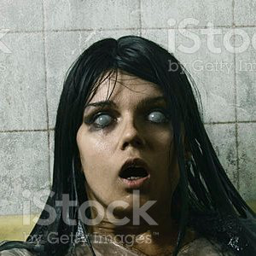

In [9]:
ghost = Image.open('../data/custom/ghost.jpg')
ghost = ghost.resize((256,256))
ghost

In [10]:
payload = {
    'src_img': util.image_to_base64(ghost),
    'ref_img': util.image_to_base64(portrait),
    'ref_class': 'male',
    'align_face': True
}

In [11]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 8.66 ms, sys: 556 µs, total: 9.21 ms
Wall time: 225 ms


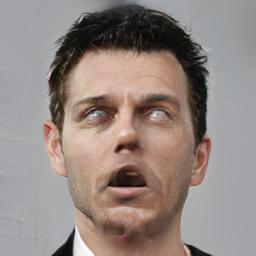

In [12]:
response_json = response.json()
util.base64_to_image(response_json['output_img'])

### Wizard

Wizard as reference image

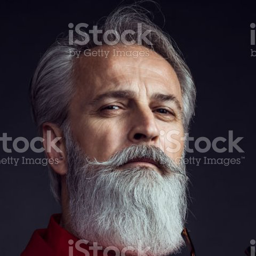

In [13]:
wizard = Image.open('../data/custom/wizard.jpg')
wizard = wizard.resize((256,256))
wizard

In [14]:
payload = {
    'src_img': util.image_to_base64(portrait),
    'ref_img': util.image_to_base64(wizard),
    'ref_class': 'male',
    'align_face': True
}

In [15]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 1.14 ms, sys: 3.69 ms, total: 4.83 ms
Wall time: 206 ms


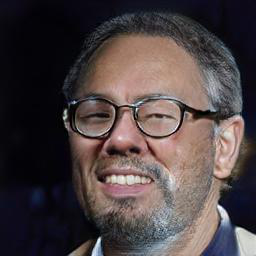

In [16]:
response_json = response.json()
util.base64_to_image(response_json['output_img'])

### Elf 

Elf as reference picture

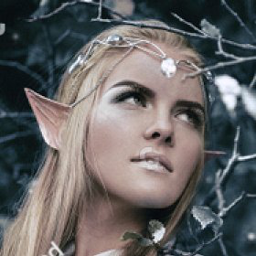

In [17]:
elf = Image.open('../data/custom/elf.jpg')
elf = elf.resize((256,256))
elf

In [18]:
payload = {
    'src_img': util.image_to_base64(portrait),
    'ref_img': util.image_to_base64(elf),
    'ref_class': 'female',
    'align_face': True
}

In [19]:
%%time
response = requests.post(URL, json=payload)

CPU times: user 5.12 ms, sys: 148 µs, total: 5.27 ms
Wall time: 222 ms


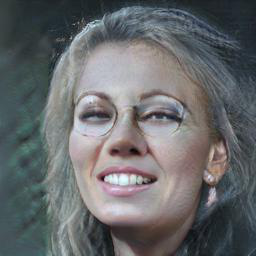

In [20]:
response_json = response.json()
util.base64_to_image(response_json['output_img'])